<a href="https://www.kaggle.com/code/tolgatanrisever/world-univetcity-rank-plotly?scriptVersionId=91426504" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# INTRODUCTION
* In this kernel, we will learn how to use plotly library.<br>
* Plotly library: Plotly's Python graphing library makes interactive, publication-quality graphs online. Examples of how to make line plots, &emsp scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble 
carts.<br>

Content:<br>

[1. Loading Data and Explanation of Features](#1)<br>
[2. Line Charts](#2)<br>
[3. Scatter Charts](#3)<br>
[4. Bar Charts](#4)<br>
[5. Pie Charts](#5)<br>
[6. Bubble Charts](#6)<br>
[7. Histogram](#7)<br>
[8. Word Cloud](#8)<br>
[9. Box Plot](#9)<br>
[10. Scatter Plot Matrix](#10)<br>
11. Map Plots: https://www.kaggle.com/tolgatanrisever/tsp-tutorial-plotly-map-with-eda<br>
12. Data Visualization<br>
12.1. Seaborn: https://www.kaggle.com/tolgatanrisever/seborn-start-eda<br>
12.2. Bokeh 1: <br>
12.3. Bokeh 2: <br>
12.4. Rare Visualization:https://www.kaggle.com/code/tolgatanrisever/rarevisualizationtools <br>
[13. Inset Plots](#13)<br>
[14. 3D Scatter Plot with Colorscaling](#14)<br>
[15. Multiple Subplots](#15)<br>
16. Earthquake Animation: https://www.kaggle.com/code/tolgatanrisever/earthquake-animation-plotly<br>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv


<a id='1'></a><br>
## Loading Data and Explanation of Features
<font color='red'>
timesData includes 14 features that are:
    </font><br>
&emsp;* world_rank<br>
&emsp;* university_name<br>
&emsp;* country<br>
&emsp;* teaching<br>
&emsp;* international<br>
&emsp;* research<br>
&emsp;* citations<br>
&emsp;* income<br>
&emsp;* total_score<br>
&emsp;* num_students<br>
&emsp;* student_staff_ratio<br>
&emsp;* international_students<br>
&emsp;* female_male_ratio<br>
&emsp;* year<br>

In [2]:
# Load data that we will use.
timesData = pd.read_csv("/kaggle/input/world-university-rankings/timesData.csv")

In [3]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [4]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


<a id='2'></a><br>
# 2. Line Charts




Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities

Import graph_objs as go
Creating traces
x = x axis
y = y axis
mode = type of plot like marker, line or line + markers
name = name of the plots
marker = marker is used with dictionary.
color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
text = The hover text (hover is curser)
data = is a list that we add traces into it
layout = it is dictionary.
title = title of layout
x axis = it is dictionary
title = label of x axis
ticklen = length of x axis ticks
zeroline = showing zero line or not
fig = it includes data and layout
iplot() = plots the figure(fig) that is created by data and layout

In [5]:
# prepare data frame
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines+markers",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'percent',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id='3'></a><br>
# 3. Scatter Plot


## Scatter Example: Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years

* Import graph_objs as go<br>
* Creating traces<br>
&nbsp;* x = x axis<br>
&nbsp;* y = y axis<br>
&nbsp;*mode = type of plot like marker, line or line + markers<br>
&nbsp;*name = name of the plots<br>
&nbsp;* marker = marker is used with dictionary.<br>
&nbsp;&nbsp;* color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)<br>
&nbsp;* text = The hover text (hover is curser)<br>
* data = is a list that we add traces into it<br>
* layout = it is dictionary.<br>
* title = title of layout<br>
* x axis = it is dictionary<br>
&nbsp;&nbsp;* title = label of x axis<br>
&nbsp;&nbsp;* ticklen = length of x axis ticks<br>
&nbsp;&nbsp;* zeroline = showing zero line or not<br>
&nbsp;* y axis = it is dictionary and same with x axis<br>
* fig = it includes data and layout<br>
* iplot() = plots the figure(fig) that is created by data and layout<br>

In [6]:
array=timesData.university_name.unique()
c=0
for i in array:
    c=c+1
c   

818

In [7]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [8]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.total_score,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.total_score,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.total_score,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'total_score',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [9]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2014.citations,
                    y = df2014.total_score,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.citations,
                    y = df2015.total_score,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.citations,
                    y = df2016.total_score,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'citations',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'total_score',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id='4'></a><br>
# 4.Bar Plot


# Bar Charts
<font color='red'>
First Bar Charts Example: citations and teaching of top 3 universities in 2014 (style1)<br>
</font>
* Import graph_objs as go<br>
* Creating traces<br>
&nbsp;* x = x axis<br>
&nbsp;* y = y axis<br>
&nbsp;* mode = type of plot like marker, line or line + markers<br>
&nbsp;* name = name of the plots<br>
&nbsp;* marker = marker is used with dictionary.<br>
&nbsp;&nbsp;* color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)<br>
&nbsp;* line = It is dictionary. line between bars<br>
&nbsp;&nbsp;* color = line color around bars<br>
&nbsp;* text = The hover text (hover is curser)<br>
* data = is a list that we add traces into it<br>
* layout = it is dictionary.<br>
&nbsp;* barmode = bar mode of bars like grouped<br>
* fig = it includes data and layout<br>
* iplot() = plots the figure(fig) that is created by data and layot<br>

In [10]:
df14=timesData[timesData.year==2014].iloc[:3,:]
df14

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [11]:
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df14.university_name,
                y = df14.citations,
                name = "citations",
                type= 'bar',
                
                marker = dict(color = 'rgba(255, 102, 0)',line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df14.country)
trace2 = go.Bar(
                 x=df14.university_name,
                 y=df14.teaching,
                 name="teacing",
                 type='bar',
                 
                 
                 marker=dict(color='rgba(0, 153, 0,0.5)',line=dict(color='rgb(0,0,0)',width=1.5)),
                 text=(df14.country)
                 )
data=[trace1,trace2]
layout=dict(title="Citations and teaching of top 3 universities in 2014",
           xaxis=dict(title="University Name"),
           yaxis=dict(title="Point"),
           barmode='relative')#If we don't, they stand side by side.



# fig = dict(data = data, layout = layout)
fig=go.Figure(data=data,layout=layout)
# iplot(fig)
fig.update_layout(barmode='relative',
    title={
        'text': "Citations and teaching of top 3 universities in 2014",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(0, 153, 0,0.5)'})
fig.update_xaxes(title_text="Top 3 Universities",  
                 color='rgba(0, 153, 0,0.5)',
                 )


In [12]:
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df14.university_name,
                y = df14.citations,
                name = "citations",
                type= 'bar',
                
                marker = dict(color = 'rgba(255, 102, 0)',line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df14.country)
trace2 = go.Bar(
                 x=df14.university_name,
                 y=df14.teaching,
                 name="teacing",
                 type='bar',
                 
                 marker=dict(color='rgba(0, 153, 0,0.5)',line=dict(color='rgb(0,0,0)',width=1.5)),
                 text=(df14.country)
                 )
data=[trace1,trace2]
layout=dict(title="Citations and teaching of top 3 universities in 2014",
           xaxis=dict(title="University Name"),
           yaxis=dict(title="Point"),
           )



fig = go.Figure(data = data, layout = layout)
iplot(fig)



In [13]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [14]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
x = df2014.university_name
trace1={
    'x':x,
    'y':df14.citations,
    'name':'Citations',
    'type':'bar'
};
trace2={
    'x':x,
    'y':df14.teaching,
    'name':'Teaching',
    'type':'bar'
};
data=[trace1,trace2]
layout={
    'xaxis':{'title':'Top 3 Universities'},
    'barmode':'relative',
    'title':'Citations and teaching of top 3 universities in 2014'
};

fig=go.Figure(data=data,layout=layout)
# iplot(fig)
fig.update_layout(
    title={
#         'text': "Citations and teaching of top 3 universities in 2014",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

Third Bar Charts Example: Horizontal bar charts. (style3) Citation vs income for universities

Import graph_objs as go and importing tools<br>
Tools: used for subplots<br>
Creating trace1<br>
bar: bar plot<br>
x = x axis<br>
y = y axis<br>
marker<br>
color: color of bars<br>
line: bar line color and width<br>
name: name of bar<br>
orientation: orientation like horizontal<br>
creating trace2<br>
scatter: scatter plot<br>
x = x axis<br>
y = y axis<br>
mode: scatter type line line + markers or only markers<br>
line: properties of line<br>
color: color of line<br>
name: name of scatter plot<br>
layout: axis, legend, margin, paper and plot properties *<br>

In [15]:
# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# prepare data frames
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)
layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<a id='5'></a><br>
# 5.Pie Chart


<font color='red'>
Pie Charts Example: Students rate of top 7 universities in 2016<br>
</font><br>
fig: create figures<br>
data: plot type<br>
values: values of plot<br>
labels: labels of plot<br>
name: name of plots<br>
hoverinfo: information in hover<br>
hole: hole width<br>
type: plot type like pie<br>
layout: layout of plot<br>
title: title of layout<br>
annotations: font, showarrow, text, x, y<br>

In [16]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [17]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

In [18]:
    trace1=go.Bar(#or go.Scatter
                  x=df2016.university_name,
                  y=pie1_list ,
                  name="Number of student",
                  marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                  text = df2016.num_students,
                  )
data=[trace1]
layout=dict(title="number of student",
           xaxis=dict(title="-"),
           yaxis=dict(title="-"),
           )#If we don't, they stand side by side.



fig = dict(data = data, layout = layout)

iplot(fig)


In [19]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name

fig = go.Figure(data=[go.Pie(labels=labels, values=pie1_list, hole=.3)])
fig.update_layout(barmode='relative',
    title={
        'text': "Number of Student",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(0, 0, 0,1)',
        'font_size':30})
fig.show()

<a id='6'></a><br>
# 6.Bubble Chart

<font color='red'>
    Bubble Charts Example: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016</font><br>

* x = x axis<br>
* y = y axis<br>
* mode = markers(scatter)<br>
* marker = marker properties<br>
* color = third dimension of plot. Internaltional score<br>
* size = fourth dimension of plot. Number of students<br>
* text: university names<br>

In [20]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [21]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True,
           
        },
        "text" :  df2016.university_name ,
        
    }
]



layout={
    'xaxis':{'title':'world rank'},
    'yaxis':{'title':'teaching'},
    
   
};

fig=go.Figure(data=data,layout=layout)

fig.update_layout(
    title={
        'text': "University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
# iplot(fig)
# iplot(data)




In [22]:
type(data[0])

dict

<a id='7'></a><br><br>
# 7. Histogram
<font color='red'>
Lets look at histogram of students-staff ratio in 2011 and 2012 years.<br>
</font>
trace1 = first histogram<br>
x = x axis<br>
y = y axis
opacity = opacity of histogram<br>
name = name of legend<br>
marker = color of histogram<br>
trace2 = second histogram<br>
layout = layout<br>
barmode = mode of histogram like overlay. Also you can change it with stack<br>

In [23]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [24]:
# prepare data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]
trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))
data = [trace1, trace2]
layout = go.Layout(
    title={
        'text':'students-staff ratio in 2011 and 2012',
        'y':0.9,
        'x':0.5,
        'xanchor': 'left',
        'yanchor': 'top' },          
    barmode='overlay',  
    xaxis=dict(title='students-staff ratio'),
    yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)


iplot(fig)

<a id='8'></a><br>
# 8. Word Cloud<br>
*  Not a pyplot but learning it is good for visualization. Lets look at which country is mentioned most in 2011.<br>
 <br>
* WordCloud = word cloud library that I import at the beginning of kernel<br>
* &emsp;background_color = color of back ground<br>
* &emsp;generate = generates the country name list(x2011) a word cloud<br>

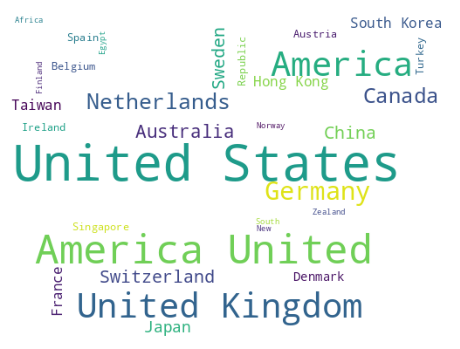

In [25]:
# data prepararion
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [26]:
# ?WordCloud

<a id='9'></a><br>
# 9. Box Plot<br>

* Box Plots<br>

&emsp;&emsp;&emsp;* Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It is also called 50% percentile that is 50% of data are less that median(50th quartile)(quartile)<br>
<font color='red'><br>
&emsp;&emsp;&emsp;&emsp;* 25th percentile = quartile 1 (Q1) that is lower quartile<br>
&emsp;&emsp;&emsp;&emsp;* 75th percentile = quartile 3 (Q3) that is higher quartile<br>
&emsp;&emsp;&emsp;&emsp;* height of box = IQR = interquartile range = Q3-Q1<br>
&emsp;&emsp;&emsp;&emsp;* Whiskers = 1.5 * IQR from the Q1 and Q3<br>
&emsp;&emsp;&emsp;&emsp;* Outliers = being more than 1.5*IQR away from median commonly.<br>
</font><br>
&emsp;&emsp;* trace = box<br>
&emsp;&emsp;&emsp;&emsp;* y = data we want to visualize with box plot<br>
&emsp;&emsp;&emsp;&emsp;* marker = color<br>

In [27]:
x2015 = timesData[timesData.year == 2015]
x2015.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1402,1,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67,2015
1403,2,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,"20,152",8.9,25%,NaN,2015
1404,3,University of Oxford,United Kingdom,88.6,90.7,97.7,95.5,72.9,93.2,"19,919",11.6,34%,46 : 54,2015
1405,4,Stanford University,United States of America,91.5,69.0,96.7,99.1,63.1,92.9,"15,596",7.8,22%,42 : 58,2015
1406,5,University of Cambridge,United Kingdom,89.7,87.8,95.6,95.2,51.1,92.0,"18,812",11.8,34%,46 : 54,2015


In [28]:
# data preparation
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )  
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

<a id='10'></a>
# 10.Scatter Plot Matrix<br>
<font color='red'>
Scatter Matrix = it helps us to see covariance and relation between more than 2 features<br>
<br></font>
import figure factory as ff<br>
create_scatterplotmatrix = creates scatter plot<br>
&emsp;&emsp;data2015 = prepared data. It includes research, international and total scores with index from 1 to 401<br>
&emsp;&emsp;colormap = color map of scatter plot<br>
&emsp;&emsp;colormap_type = color type of scatter plot<br>
&emsp;&emsp;height and weight<br>

In [29]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



<a id='13'></a>
# 13. Inset Plots
<font color='red'>
Inset Matrix = 2 plots are in one frame

In [30]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    

)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    title={
        'text': "Income and Teaching vs World Rank of Universities",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

<a id='14'></a>
# 14.3D Scatter Plot with Colorscaling<br>


<font color='red'><br>
3D Scatter: Sometimes 2D is not enough to understand data. Therefore adding one more dimension increase <br>the intelligibility of the data. Even we will add color that is actually 4th dimension.<br></font>

go.Scatter3d: create 3d scatter plot<br>
x,y,z: axis of plots<br>
mode: market that is scatter<br>
size: marker size<br>
color: axis of colorscale<br>
colorscale: actually it is 4th dimension<br>

In [31]:
dataframe.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1402,1,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67,2015
1403,2,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,"20,152",8.9,25%,NaN,2015
1404,3,University of Oxford,United Kingdom,88.6,90.7,97.7,95.5,72.9,93.2,"19,919",11.6,34%,46 : 54,2015
1405,4,Stanford University,United States of America,91.5,69.0,96.7,99.1,63.1,92.9,"15,596",7.8,22%,42 : 58,2015
1406,5,University of Cambridge,United Kingdom,89.7,87.8,95.6,95.2,51.1,92.0,"18,812",11.8,34%,46 : 54,2015


In [32]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    text=dataframe.university_name,
    marker=dict(
        size=8,
        color=dataframe.index,
        colorscale='Viridis',   # choose a colorscale
                        # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene = dict(
                    
#                     xaxis_title='X AXIS TITLE',
#                     yaxis_title='Y AXIS TITLE',
#                     zaxis_title='Z AXIS TITLE'),
#                     width=700,
#                     margin=dict(r=20, b=10, l=10, t=10),
#                     
                 
                     xaxis = dict(
                         title="world rank",
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        title="research",
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        title="citation",
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",)
                    
                 
                 ),
                 title={
                        'text':'world rank,research,citation',
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'left',
                        'yanchor': 'top' })
                    
iplot(fig)

<a id='15'></a>
# 15. Multiple Subplots
Multiple Subplots: While comparing more than one features, multiple subplots can be useful.

In [33]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
